In [2]:
import pandas as pd
import numpy as np


import seaborn as sn
import matplotlib.pyplot as plt

In [12]:
cen_normal = "../cenarios/cen_nova_versao/normal/"
cen_media2 = "../cenarios/cen_nova_versao/media2/"
cen_media5 = "../cenarios/cen_nova_versao/media5/"

cen_normal_rate = cen_normal+"rates/"
cen_media2_rate = cen_media2+"rates/"
cen_media5_rate = cen_media5+"rates/"

In [27]:
def metrics_plots(cen_rate_path):
    bar_loc = np.arange(1,7)  # the x locations for the groups
    bar_width = 0.5 
    bars_tp = np.zeros([3,6])
    bars_fp = np.zeros([3,6])
    bars_prec = np.zeros([3,6])
    all_cen = ['k%d_l%d_h%d' %(x,y,z)   for z in [1,2,3] for x,y in zip([1,2,3,4,5,6],[1,2,3,4,5,6])]
    
    i = 0
    count_cen = 0
    for cen in all_cen:
        bars_tp[i][count_cen] = pd.read_csv(cen_rate_path+"metricas_"+cen+".csv", index_col=0)['tp_rate']
        bars_fp[i][count_cen] = pd.read_csv(cen_rate_path+"metricas_"+cen+".csv", index_col=0)['fp_rate']
        bars_prec[i][count_cen] = pd.read_csv(cen_rate_path+"metricas_"+cen+".csv", index_col=0)['precisao']
        count_cen +=1

        if count_cen > 5:
            i+=1
            count_cen = 0
    count = 0
    for fp_bar, tp_bar, prec_bar, j in zip(bars_fp, bars_tp, bars_prec, np.arange(1,4)):
        count+=1
        data = pd.DataFrame({'Verdadeiros positivos':tp_bar,'Falsos positivos': fp_bar, 'Precisão': prec_bar}, index=np.arange(1,7))
        a = data.plot(kind='bar',rot=0)
        a.set_xlabel("k, l")
        a.set_ylabel("Quantiadade de relações de \n causalidade encontradas. (h = " + str(j) +")" )
       # prec_ax = data_prec.plot(kind='bar', rot=0)

        if count == 1:
            a.legend(bbox_to_anchor=[0.44,1.26])
cen_normal_rate

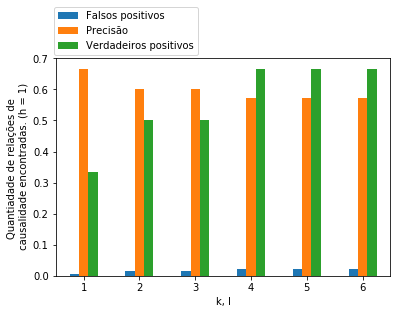

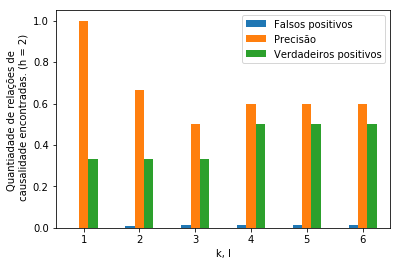

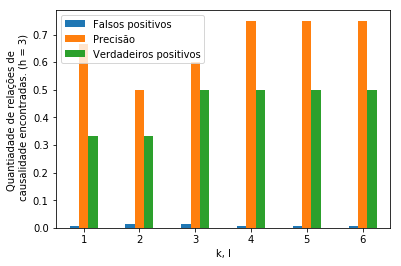

In [31]:
metrics_plots(cen_media5_rate)